<a href="https://colab.research.google.com/github/purushothaman7/DLC-Lab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_file = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)


base_dir = zip_file.replace('cats_and_dogs.zip', 'cats_and_dogs_filtered/')
train_dir = base_dir + 'train/'
validation_dir = base_dir + 'validation/'


train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)


class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")


NameError: name 'tf' is not defined

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_dataset,
    epochs=2,
    validation_data=validation_dataset
)


Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5146 - loss: 0.6964 - val_accuracy: 0.5310 - val_loss: 0.6881
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5232 - loss: 0.6911 - val_accuracy: 0.5090 - val_loss: 0.6917


In [ ]:

loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation accuracy: {accuracy * 100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 456ms/step - accuracy: 0.5230 - loss: 0.6923
Validation accuracy: 50.90%


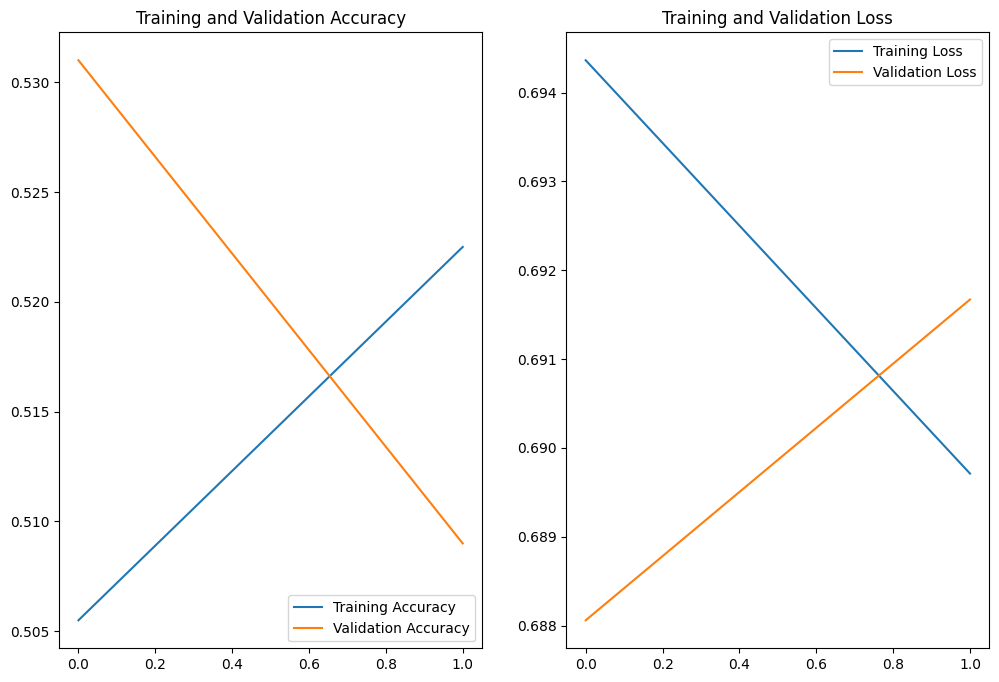

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
